# Amplitude, Power and Decibels (dB)

We'll explore how [amplitude](./01_sound_waves.ipynb#Amplitude) relates to power, and how both can be expressed in the logarithmic decibel scale.
Through theory and visualizations, you'll gain a clear understanding of:

- The difference between amplitude and power in signals
- Why power is proportional to the square of amplitude
- How and why we use decibels to express ratios of amplitude and power

:::{attention}
This knowledge is essential for working with sound, music technology, and audio engineering.
:::

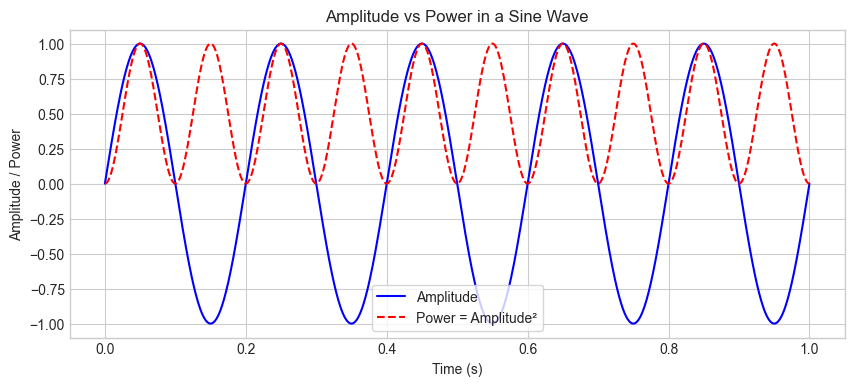

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['axes.grid'] = True
plt.rcParams['legend.frameon'] = True

t = np.linspace(0, 1, 1000)
A = 1  # Amplitude
signal = A * np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave
power = signal ** 2  # Instantaneous power

plt.figure(figsize=(10, 4))
plt.plot(t, signal, label="Amplitude", color='blue')
plt.plot(t, power, label="Power = Amplitude²", color='red', linestyle="dashed")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude / Power")
plt.title("Amplitude vs Power in a Sine Wave")
plt.legend()
plt.show()

## Amplitude vs Power

**Amplitude**: The direct value of a waveform (e.g., voltage, pressure).

**Power**: Proportional to the square of the amplitude.

$$
P=A^2
$$

Where:

$A$ is the amplitude.

$P$ is the power of the signal.

## Power in Decibels (dB)

It is a logarithmic unit that is used to express the ratio of two values of a physical quantity:

$$ 
\text{dB} = 10 \cdot \log_{10}\left(\frac{P}{P_{ref}}\right) 
$$

where $P$ and $P_{ref}$ are the relative powers of the sound {cite:p}`enwiki:1260411874`

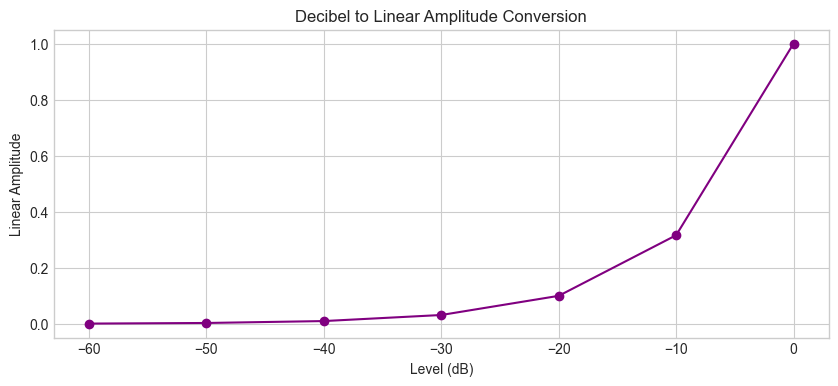

In [11]:
db_to_amp = lambda x: 10 ** (x / 20)

ref_level = 1.0
levels_db = np.arange(-60, 10, 10)  # Levels from -60 dB to 0 dB
amplitudes = db_to_amp(levels_db) * ref_level  # Convert dB to linear amplitude

plt.figure(figsize=(10, 4))
plt.plot(levels_db, amplitudes, marker='o', linestyle='-', color='purple')
plt.xlabel("Level (dB)")
plt.ylabel("Linear Amplitude")
plt.title("Decibel to Linear Amplitude Conversion")
plt.show()

## Amplitude in Decibels (dB)

**Magnitude** represents the amplitude of a signal directly. As an example, a value of 1 corresponds to "unity gain" (no amplification or attenuation) and corresponds to 0 dB (reference level). Magnitudes smaller than 1 result in negative dB values (attenuation), while magnitudes greater than 1 produce positive dB values (amplification).
The formula to convert a magnitude to decibels is:

$$
\text{dB} = 20 \cdot \log_{10}(\text{magnitude})
$$

For amplitude-based quantities (e.g. voltage, pressure), the formula is:

$$ 
\text{dB} = 20 \cdot \log_{10}\left(\frac{A}{A_{ref}}\right) 
$$

In audio, the **Decibel** scale is commonly used to express the relative loudness of sounds. The advantage of using decibels is that they allow us to express a wide range of values in a more compact form. The decibel scale is logarithmic, which means that a small change in decibels corresponds to a large change in magnitude. For example, a 3 dB increase in sound level corresponds to a doubling of the sound intensity.

The decibel scale compresses the dynamic range, making it easier to visualize and compare small and large magnitudes. The plot illustrates the relationship between magnitude (linear scale) and decibels (logarithmic scale).

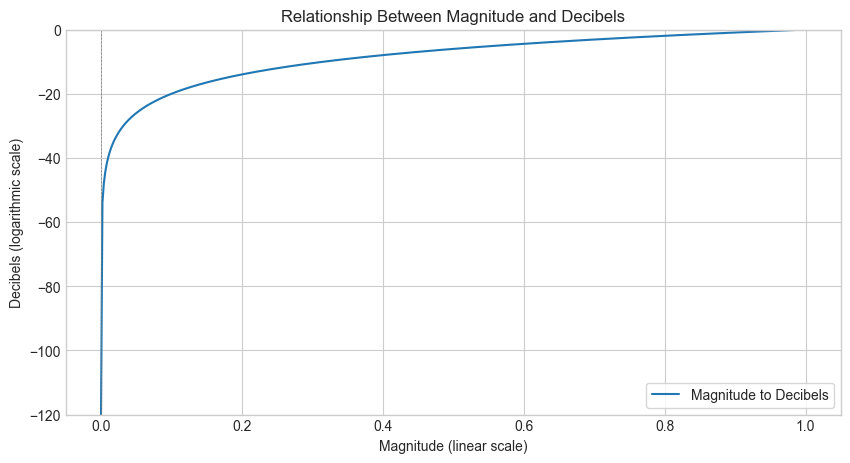

In [12]:
amp_to_db = lambda x: 20 * np.log10(x)

amplitudes = np.linspace(1e-6, 1, 500)  # Avoid log(0) issues

decibels = amp_to_db(amplitudes)

# Plot magnitude vs decibels
plt.figure(figsize=(10, 5))
plt.plot(amplitudes, -np.abs(decibels), label="Magnitude to Decibels")  # Use negative abs value for decibels

plt.ylim(-120, 0)  # Limit y to be from -120 dB to 0 dB

# Draw horizontal and vertical lines at the origin
plt.axvline(0, color="gray", linestyle="--", linewidth=0.5)
plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)

# Labels and legend
plt.title("Relationship Between Magnitude and Decibels")
plt.xlabel("Magnitude (linear scale)")
plt.ylabel("Decibels (logarithmic scale)")

# Customize y-axis ticks to show negative decibels
plt.yticks(np.arange(-120, 1, 20))  # Set ticks from -120 to 0 with a step of 20

plt.legend(frameon=True)
plt.show()

The curve in the plot is steep for very small magnitudes, showing that small changes in magnitude near zero lead to significant changes in dB.
At larger magnitudes, the curve flattens, indicating a more gradual change in dB.

## Voltage and Decibels

### Voltage in Decibels (dBV)
**dBV** is a unit of measurement that expresses the voltage level relative to 1 volt (V). The formula to convert voltage to dBV is:
$$
\text{dBV} = 20 \cdot \log_{10}\left(\frac{V}{1 \text{ V}}\right)
$$
Where:
- $V$ is the voltage level in volts (V).
- $1 \text{ V}$ is the reference voltage level (1 volt).
- $\text{dBV}$ is the voltage level in decibels relative to 1 volt.

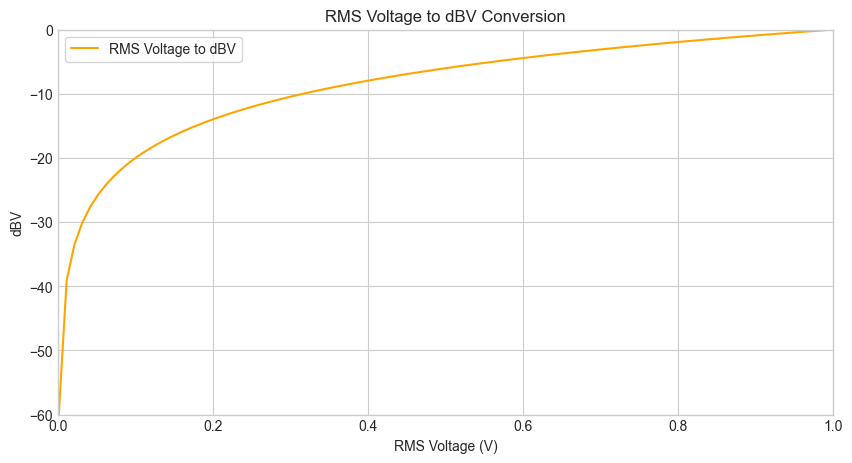

In [13]:
def voltage_to_dbv(v_rms):
    """Convert RMS voltage to dBV."""
    return 20 * np.log10(v_rms / 1.0)

# Calculate dBV for a range of RMS voltages
rms_voltages = np.linspace(0.001, 1, 100)  # Avoid log(0) issues
db_voltages = voltage_to_dbv(rms_voltages)

# Plot dBV vs RMS voltage
plt.figure(figsize=(10, 5))
plt.plot(rms_voltages, db_voltages, label="RMS Voltage to dBV", color='orange')
plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.5)
plt.title("RMS Voltage to dBV Conversion")
plt.xlabel("RMS Voltage (V)")
plt.ylabel("dBV")
plt.ylim(-60, 0)  # Limit y to be from -120 dB to 0 dB
plt.xlim(0, 1)  # Limit x to be from 0 to 1 V
plt.legend(frameon=True)
plt.show()

## Voltage in Decibels (dBu)
**dBu** is a unit of measurement that expresses the voltage level relative to 0.775 volts (V). The formula to convert voltage to dBu is:
$$
\text{dBu} = 20 \cdot \log_{10}\left(\frac{V}{0.775 \text{ V}}\right)
$$
Where:
- $V$ is the voltage level in volts (V).
- $0.775 \text{ V}$ is the reference voltage level (0.775 volts).
- $\text{dBu}$ is the voltage level in decibels relative to 0.775 volts.

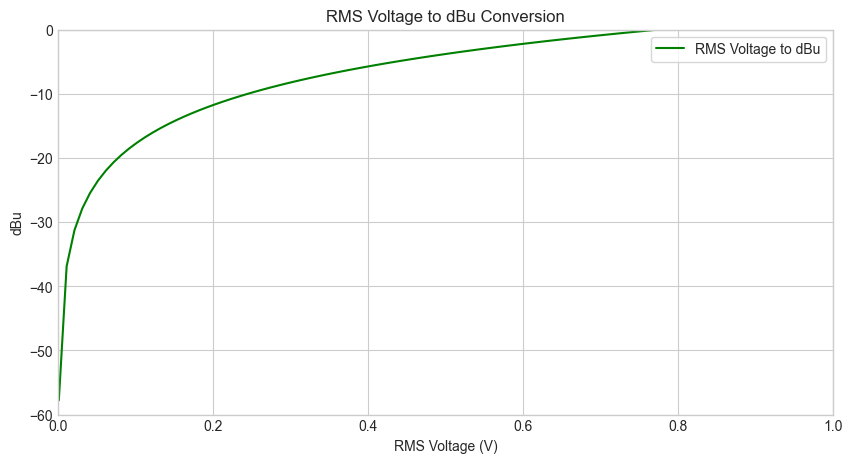

In [14]:
def voltage_to_dbuv(v_rms):
    """Convert RMS voltage to dBu."""
    return 20 * np.log10(v_rms / 0.775)

# Calculate dBu for a range of RMS voltages
rms_voltages = np.linspace(0.001, 1, 100)  # Avoid log(0) issues
db_voltages = voltage_to_dbuv(rms_voltages)

# Plot dBu vs RMS voltage
plt.figure(figsize=(10, 5))
plt.plot(rms_voltages, db_voltages, label="RMS Voltage to dBu", color='green')
plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.5)
plt.title("RMS Voltage to dBu Conversion")
plt.xlabel("RMS Voltage (V)")
plt.ylabel("dBu")
plt.ylim(-60, 0)  # Limit y to be from -120 dB to 0 dB
plt.xlim(0, 1)  # Limit x to be from 0 to 1 V
plt.legend(frameon=True)
plt.show()


Name: `t`

Type: `numpy.ndarray`

Value:


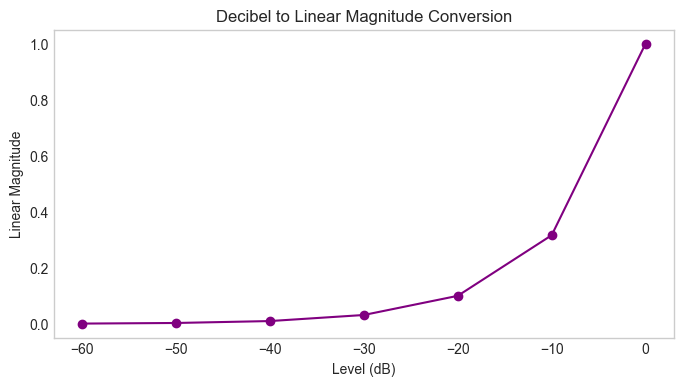

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define function to convert dB to magnitude
db_to_mag = lambda x: 10 ** (x / 20)

# Define frequency reference levels for different dB scales
ref_level = 1.0
levels_db = np.arange(-60, 10, 10)  # Levels from -60 dB to 0 dB
magnitudes = db_to_mag(levels_db) * ref_level  # Convert dB to linear magnitude

# Plot dB vs Magnitude
plt.figure(figsize=(8, 4))
plt.plot(levels_db, magnitudes, marker='o', linestyle='-', color='purple')
plt.xlabel("Level (dB)")
plt.ylabel("Linear Magnitude")
plt.title("Decibel to Linear Magnitude Conversion")
plt.grid()
plt.show()


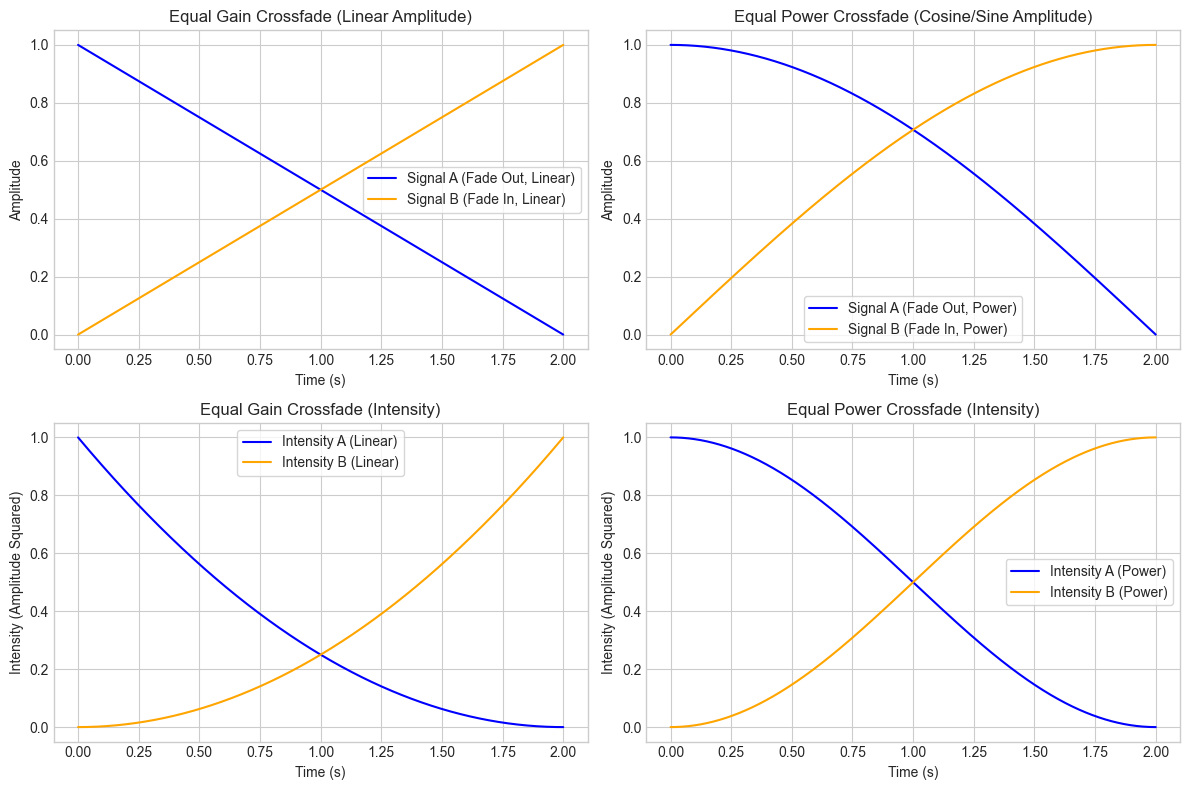

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
duration = 2.0  # 2 seconds for crossfade
sampling_rate = 44100  # Standard audio sampling rate
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Equal Gain (Linear) fade envelopes
fade_out_linear = 1 - time / duration  # Signal A fades out
fade_in_linear = time / duration      # Signal B fades in

# Equal Power fade envelopes (Cosine/Sine)
fade_out_power = np.cos(np.pi / 2 * time / duration)  # Signal A fades out
fade_in_power = np.sin(np.pi / 2 * time / duration)   # Signal B fades in

# Plotting
plt.figure(figsize=(12, 8))

# Plot Equal Gain (Linear) Crossfade
plt.subplot(2, 2, 1)
plt.plot(time, fade_out_linear, label="Signal A (Fade Out, Linear)", color='blue')
plt.plot(time, fade_in_linear, label="Signal B (Fade In, Linear)", color='orange')
plt.title("Equal Gain Crossfade (Linear Amplitude)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Plot Equal Power (Cosine/Sine) Crossfade
plt.subplot(2, 2, 2)
plt.plot(time, fade_out_power, label="Signal A (Fade Out, Power)", color='blue')
plt.plot(time, fade_in_power, label="Signal B (Fade In, Power)", color='orange')
plt.title("Equal Power Crossfade (Cosine/Sine Amplitude)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Plot intensity for Equal Gain Crossfade
intensity_out_linear = fade_out_linear**2
intensity_in_linear = fade_in_linear**2

plt.subplot(2, 2, 3)
plt.plot(time, intensity_out_linear, label="Intensity A (Linear)", color='blue')
plt.plot(time, intensity_in_linear, label="Intensity B (Linear)", color='orange')
plt.title("Equal Gain Crossfade (Intensity)")
plt.xlabel("Time (s)")
plt.ylabel("Intensity (Amplitude Squared)")
plt.legend()

# Plot intensity for Equal Power Crossfade
intensity_out_power = fade_out_power**2
intensity_in_power = fade_in_power**2

plt.subplot(2, 2, 4)
plt.plot(time, intensity_out_power, label="Intensity A (Power)", color='blue')
plt.plot(time, intensity_in_power, label="Intensity B (Power)", color='orange')
plt.title("Equal Power Crossfade (Intensity)")
plt.xlabel("Time (s)")
plt.ylabel("Intensity (Amplitude Squared)")
plt.legend()

plt.tight_layout()
plt.show()



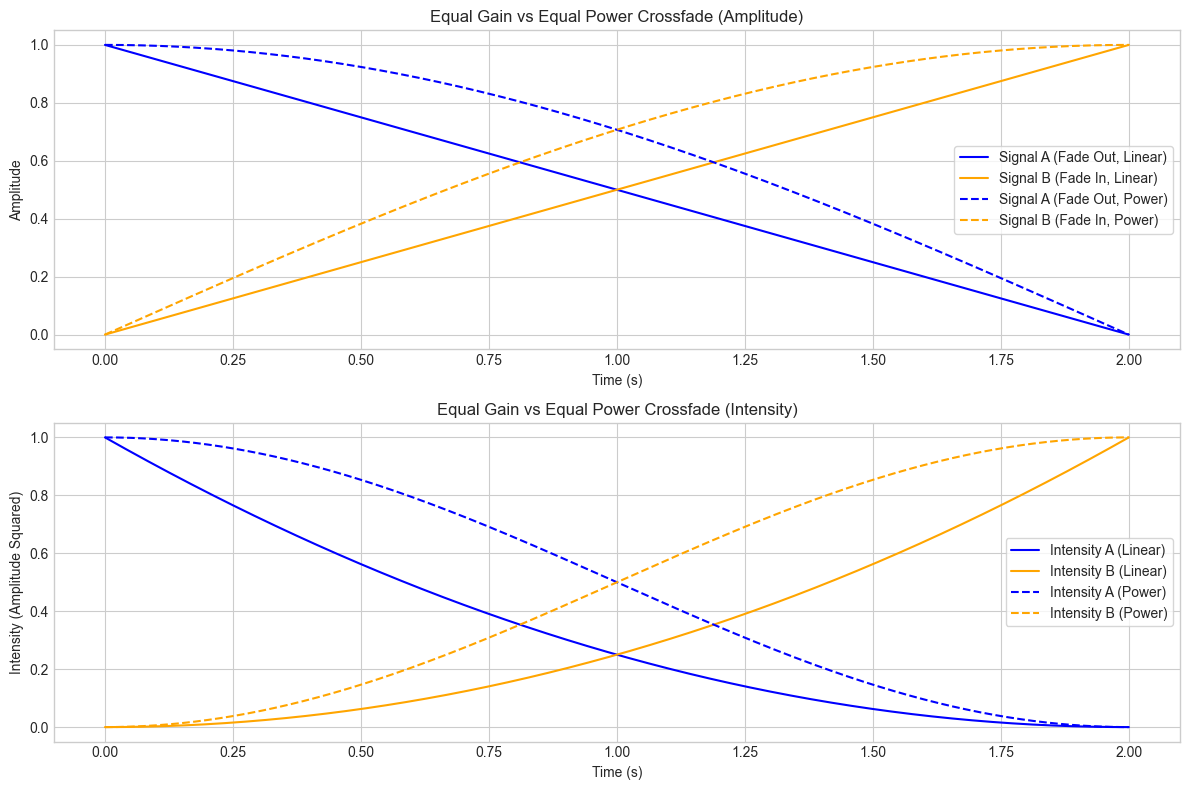

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
duration = 2.0  # 2 seconds for crossfade
sampling_rate = 44100  # Standard audio sampling rate
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Equal Gain (Linear) fade envelopes
fade_out_linear = 1 - time / duration  # Signal A fades out
fade_in_linear = time / duration      # Signal B fades in

# Equal Power fade envelopes (Cosine/Sine)
fade_out_power = np.cos(np.pi / 2 * time / duration)  # Signal A fades out
fade_in_power = np.sin(np.pi / 2 * time / duration)   # Signal B fades in

# Plotting
plt.figure(figsize=(12, 8))

# Plot Equal Gain (Linear) and Equal Power (Cosine/Sine) Crossfade Envelopes (Amplitude)
plt.subplot(2, 1, 1)
plt.plot(time, fade_out_linear, label="Signal A (Fade Out, Linear)", color='blue')
plt.plot(time, fade_in_linear, label="Signal B (Fade In, Linear)", color='orange')
plt.plot(time, fade_out_power, label="Signal A (Fade Out, Power)", linestyle='--', color='blue')
plt.plot(time, fade_in_power, label="Signal B (Fade In, Power)", linestyle='--', color='orange')
plt.title("Equal Gain vs Equal Power Crossfade (Amplitude)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Plot Intensities for Equal Gain and Equal Power
intensity_out_linear = fade_out_linear**2
intensity_in_linear = fade_in_linear**2
intensity_out_power = fade_out_power**2
intensity_in_power = fade_in_power**2

plt.subplot(2, 1, 2)
plt.plot(time, intensity_out_linear, label="Intensity A (Linear)", color='blue')
plt.plot(time, intensity_in_linear, label="Intensity B (Linear)", color='orange')
plt.plot(time, intensity_out_power, label="Intensity A (Power)", linestyle='--', color='blue')
plt.plot(time, intensity_in_power, label="Intensity B (Power)", linestyle='--', color='orange')
plt.title("Equal Gain vs Equal Power Crossfade (Intensity)")
plt.xlabel("Time (s)")
plt.ylabel("Intensity (Amplitude Squared)")
plt.legend()

plt.tight_layout()
plt.show()


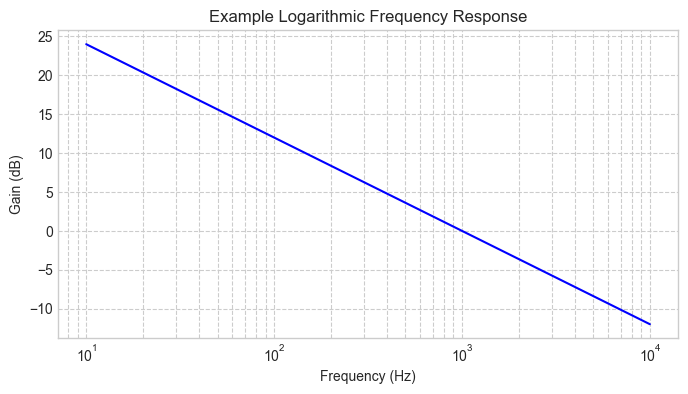

In [18]:
import numpy as np
import matplotlib.pyplot as plt

frequencies = np.logspace(1, 4, 100)  # 10 Hz to 10 kHz
gain_db = -12 * np.log10(frequencies / 1000)  # Example low-pass roll-off

plt.figure(figsize=(8, 4))
plt.semilogx(frequencies, gain_db, color="blue")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain (dB)")
plt.title("Example Logarithmic Frequency Response")
plt.grid(True, which="both", linestyle="--")
plt.show()
